## Примечание: датасет был изменён на более подходящий для задания (больше количество аттрибутов).
### Ссылка на новый датасет: https://github.com/awesomedata/awesome-public-datasets/tree/master/Datasets

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("titanic.csv")
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

### Создадим новый аттрибут 'Age group', который будет отображать является ли пассажир взрослым или ребёнком.

In [6]:
# Создаём новый аттрибут
df['Age group'] = pd.cut(df['Age'], bins=[0, 18, float('inf')], labels=['Child', 'Adult'])

# Сохраняем модифицированный датасет
df.to_csv('titanic_mod.csv', index=False)
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked Age group  
0      0         A/5 21171   7.2500   NaN        S     Adult  
1      0          PC 17599  71.2833   C85        C     Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S     Adult  
3      0            113803  53.1000  C123        S     Adult  
4      0            373450   8.0500   NaN        S     Adult  
5      0            330877   8.4583   NaN        Q       NaN  
6      0             17463  51.8625   E46        S     Adult  
7      1            349909  21.0750   NaN        S     Child  
8      2            347742  11.1333   NaN        S     Adult  
9      0            237736  30.0708   NaN        C     Child

### Далее проведём удаление выбросов, дубликатов, а также заменим пропущенные значния на на среднее

In [8]:
# Удаляем выбросы из 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

# Удаляем дубликаты
df = df.drop_duplicates()

# Меняем пропущенные значения в 'Age' на среднее
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
# Удаляем строкм с пропущенными значениями
df.dropna(inplace=True)

# Выводим фрагмент датасета
df.head(10)

PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   
21           22         1       2   
23           24         1       1   
27           28         0       1   
52           53         1       1   
62           63         0       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
62                        Harris, Mr. Henry Birkhardt    male  45.0      1   

    Parch    Ticket      Fare        Cabin Embarked Age group  
1       0  PC 17599   71.2833          C85        C     Adult  
3       0    113803   53.1000         C123        S     Adult  
6       0     17463   51.8625          E46        S     Adult  
10      1   PP 9549   16.7000           G6        S     Child  
11      0    113783   26.5500         C103        S     Adult  
21      0    248698   13.0000          D56        S     Adult  
23      0    113788   35.5000           A6        S     Adult  
27      2     19950  263.0000  C23 C25 C27        S     Adult  
52      0  PC 17572   76.7292          D33        C     Adult  
62      0     36973   83.4750          C83        S     Adult

### Посторим графики зависимостей одной переменной от другой

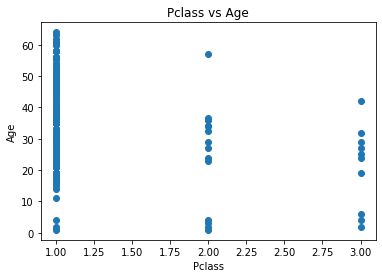

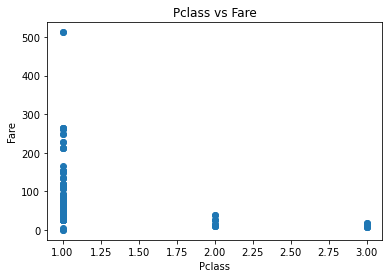

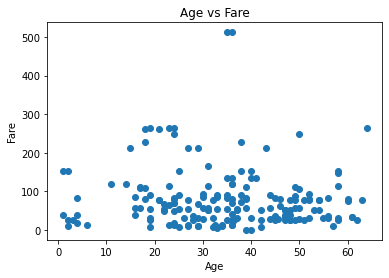

In [9]:
plt.scatter(df['Pclass'], df['Age'])
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Pclass vs Age')
plt.show()

plt.scatter(df['Pclass'], df['Fare'])
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Pclass vs Fare')
plt.show()

plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


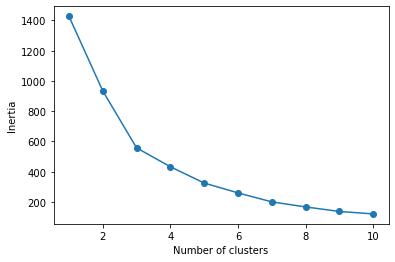

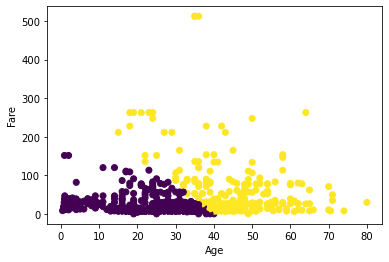

In [11]:
td = pd.read_csv('titanic.csv')
col = ['Age', 'Fare']
td = td[col].dropna()

# Нормализуем данные
scaler = StandardScaler()
scaled_data = scaler.fit_transform(td)

# Проводим поиск оптимального числа кластеров
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(scaled_data)

# Добавляем столбец с метками кластеров в исходный датасет
td['cluster'] = kmeans.labels_

# Вывод результатов
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

plt.scatter(td['Age'], td['Fare'], c=td['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()